# Custom K-NN Implementation

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

class CustomKNN(BaseEstimator, ClassifierMixin):
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.classes_ = np.unique(y)
        self.n_classes_ = len(self.classes_)

    def predict(self, X):
        predictions = []
        for x in X:
            pred, _ = self._predict(x)
            predictions.append(pred)
        return np.array(predictions)

    def predict_proba(self, X):
        probabilities = []
        for x in X:
            _, prob = self._predict(x)
            probabilities.append(prob)
        return np.array(probabilities)

    def _predict(self, x):
        distances = [self.euclidean_distance(x, p) for p in self.X_train]
        indices = np.argsort(distances)[:self.k]
        labels = [self.y_train[i] for i in indices]
        counts = np.bincount(labels, minlength=self.n_classes_)
        pred = np.argmax(counts)
        prob = counts / self.k
        return pred, prob

    def score(self, y_pred, y_true):
        return np.mean(y_pred == y_true)

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))


# Stage 1

**Predict result_1:** Direct Acceptance (0), Direct Rejection (1), Interview (2)

# Without features is_boun, is_ie

In [ ]:
class CustomKNN(BaseEstimator, ClassifierMixin):
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = [self.euclidean_distance(x, p) for p in self.X_train]
        indices = np.argsort(distances)[:self.k]
        labels = [self.y_train[i] for i in indices]
        return max(set(labels), key = labels.count)

    def score(self, X, y):
        pred = self.predict(X)
        return sum(pred == y) / len(y)

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

# Step 1: Read the data from the Excel file
df = pd.read_excel("final_data492.xlsx", decimal=',')

# Step 2: Drop unnecessary columns and separate features and target variable
df_dropped = df.drop(columns=['interview_score', 'result_2', 'year', 'is_fall'])
X = df_dropped.drop(columns=['result_1'])
y = df_dropped['result_1'].values

X.drop(columns=['is_boun', 'is_ie'], inplace=True)

# Step 3: Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train the model with different values of k and evaluate performance using cross-validation
for i in range(2, 10):
    knn = CustomKNN(i)
    cv_scores = cross_val_score(knn, X_scaled, y, cv=5)  # 5-fold cross-validation
    print(f"K = {i}, Mean CV Score: {cv_scores.mean()}, CV Scores: {cv_scores}")


K = 2, Mean CV Score: 0.8269970022923646, CV Scores: [0.78504673 0.90654206 0.80188679 0.85849057 0.78301887]
K = 3, Mean CV Score: 0.8514371363075295, CV Scores: [0.82242991 0.91588785 0.8490566  0.85849057 0.81132075]
K = 4, Mean CV Score: 0.851454769881855, CV Scores: [0.81308411 0.91588785 0.83962264 0.86792453 0.82075472]
K = 5, Mean CV Score: 0.8346147064009874, CV Scores: [0.80373832 0.85046729 0.85849057 0.85849057 0.80188679]
K = 6, Mean CV Score: 0.8458825603949922, CV Scores: [0.79439252 0.88785047 0.86792453 0.86792453 0.81132075]
K = 7, Mean CV Score: 0.8364838652794921, CV Scores: [0.80373832 0.85981308 0.8490566  0.86792453 0.80188679]
K = 8, Mean CV Score: 0.8590195732675013, CV Scores: [0.82242991 0.89719626 0.88679245 0.87735849 0.81132075]
K = 9, Mean CV Score: 0.8421266090636573, CV Scores: [0.81308411 0.85981308 0.86792453 0.86792453 0.80188679]


# With feature is boun and is ie student

In [ ]:
class CustomKNN(BaseEstimator, ClassifierMixin):
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = [self.euclidean_distance(x, p) for p in self.X_train]
        indices = np.argsort(distances)[:self.k]
        labels = [self.y_train[i] for i in indices]
        return max(set(labels), key = labels.count)

    def score(self, X, y):
        pred = self.predict(X)
        return sum(pred == y) / len(y)

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

# Step 1: Read the data from the Excel file
df = pd.read_excel("final_data492.xlsx", decimal=',')

# Step 2: Drop unnecessary columns and separate features and target variable
df_dropped = df.drop(columns=['interview_score', 'result_2', 'year', 'is_fall'])
X = df_dropped.drop(columns=['result_1'])
y = df_dropped['result_1'].values

# Step 3: Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train the model with different values of k and evaluate performance using cross-validation
for i in range(2, 10):
    knn = CustomKNN(i)
    cv_scores = cross_val_score(knn, X_scaled, y, cv=5)  # 5-fold cross-validation
    print(f"K = {i}, Mean CV Score: {cv_scores.mean()}, CV Scores: {cv_scores}")


K = 2, Mean CV Score: 0.7969141244930348, CV Scores: [0.75700935 0.87850467 0.76415094 0.81132075 0.77358491]
K = 3, Mean CV Score: 0.8420560747663552, CV Scores: [0.85046729 0.85981308 0.8490566  0.8490566  0.80188679]
K = 4, Mean CV Score: 0.8420737083406806, CV Scores: [0.82242991 0.87850467 0.87735849 0.83962264 0.79245283]
K = 5, Mean CV Score: 0.8326750132251807, CV Scores: [0.81308411 0.86915888 0.86792453 0.83018868 0.78301887]
K = 6, Mean CV Score: 0.836378063833539, CV Scores: [0.8317757  0.88785047 0.85849057 0.81132075 0.79245283]
K = 7, Mean CV Score: 0.8383353905836713, CV Scores: [0.8317757  0.85046729 0.89622642 0.82075472 0.79245283]
K = 8, Mean CV Score: 0.8364662317051668, CV Scores: [0.80373832 0.86915888 0.89622642 0.82075472 0.79245283]
K = 9, Mean CV Score: 0.8158525833186386, CV Scores: [0.78504673 0.81308411 0.87735849 0.83018868 0.77358491]


# K Fold Cross Validation, with feature is boun ie student

In [ ]:
class CustomKNN(BaseEstimator, ClassifierMixin):
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = [self.euclidean_distance(x, p) for p in self.X_train]
        indices = np.argsort(distances)[:self.k]
        labels = [self.y_train[i] for i in indices]
        return max(set(labels), key = labels.count)

    def score(self, X, y):
        pred = self.predict(X)
        return sum(pred == y) / len(y)

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

# Step 1: Read the data from the Excel file
df = pd.read_excel("final_data492.xlsx", decimal=',')

# Step 2: Drop unnecessary columns and separate features and target variable
df_dropped = df.drop(columns=['interview_score', 'result_2', 'year', 'is_fall'])
X = df_dropped.drop(columns=['result_1'])
y = df_dropped['result_1'].values

# Merge 'is_boun' and 'is_ie' into one binary feature 'is_boun_ie'
X['is_boun_ie'] = X['is_boun'] & X['is_ie']
X.drop(columns=['is_boun', 'is_ie'], inplace=True)

# Step 3: Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train the model with different values of k and evaluate performance using cross-validation
for i in range(2, 10):
    knn = CustomKNN(i)
    cv_scores = cross_val_score(knn, X_scaled, y, cv=5)  # 5-fold cross-validation
    print(f"K = {i}, Mean CV Score: {cv_scores.mean()}, CV Scores: {cv_scores}")


K = 2, Mean CV Score: 0.840134015164874, CV Scores: [0.81308411 0.91588785 0.81132075 0.83962264 0.82075472]
K = 3, Mean CV Score: 0.855245988361841, CV Scores: [0.8411215  0.87850467 0.85849057 0.85849057 0.83962264]
K = 4, Mean CV Score: 0.851454769881855, CV Scores: [0.8411215  0.88785047 0.83018868 0.86792453 0.83018868]
K = 5, Mean CV Score: 0.8421089754893316, CV Scores: [0.82242991 0.85981308 0.8490566  0.85849057 0.82075472]
K = 6, Mean CV Score: 0.8496208781520014, CV Scores: [0.82242991 0.87850467 0.87735849 0.8490566  0.82075472]
K = 7, Mean CV Score: 0.8477164521248458, CV Scores: [0.8411215  0.86915888 0.85849057 0.8490566  0.82075472]
K = 8, Mean CV Score: 0.8627226238758597, CV Scores: [0.85046729 0.90654206 0.86792453 0.85849057 0.83018868]
K = 9, Mean CV Score: 0.8458825603949922, CV Scores: [0.8317757  0.85046729 0.88679245 0.8490566  0.81132075]


In [ ]:
# Step 1: Read the data, specifying the decimal separator
df = pd.read_excel("final_data492.xlsx", decimal=',')

# Step 2: Separate features and target variable
X = df.drop(columns=['result_1'])
y = df['result_1'].values

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Store the dropped columns and drop them from the training and testing sets
dropped_columns_train = X_train[['year', 'result_2', 'is_fall', 'interview_score']]
dropped_columns_test = X_test[['year', 'result_2', 'is_fall', 'interview_score']]

X_train.drop(columns=['year', 'result_2', 'is_fall', 'interview_score'], inplace=True)
X_test.drop(columns=['year', 'result_2', 'is_fall', 'interview_score'], inplace=True)

# Step 5: Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Fit the model, make predictions, and calculate the accuracy
knn = CustomKNN(3)
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)
accuracy = knn.score(pred, y_test)
print("Accuracy:", accuracy)

# Step 7: Merge predictions, actual labels, and features with dropped columns
results_df = pd.DataFrame({'Predicted_Result_1': pred, 'Actual_Result_1': y_test})
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)  # Convert X_test array to DataFrame
results_df = pd.concat([results_df, X_test_df.reset_index(drop=True), dropped_columns_test.reset_index(drop=True)], axis=1)

# Step 8: Concatenate with the original DataFrame
final_df = pd.concat([df, results_df], axis=1)

# Step 9: Save to Excel
final_df.to_excel('final_data_with_predictions.xlsx', index=False)


Accuracy: 0.8785046728971962


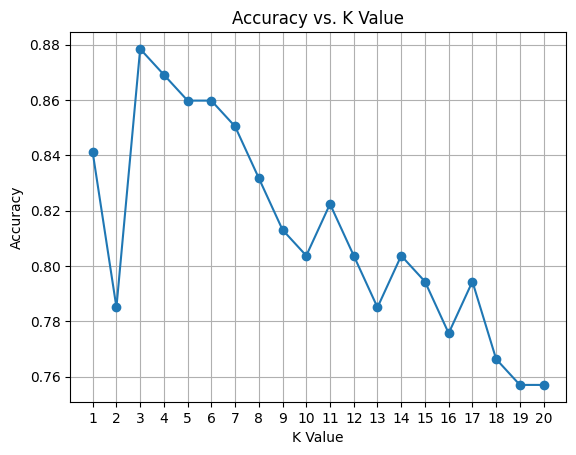

In [ ]:
# Initialize an empty list to store the accuracies
accuracies = []

# Iterate over each K value
for k in k_values:
    # Initialize and train the classifier
    knn = CustomKNN(k)
    knn.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = knn.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = knn.score(y_pred, y_test)

    # Append accuracy to the list
    accuracies.append(accuracy)

# Plot the results
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.64      0.54      0.58        13
           2       0.86      0.91      0.88        55

    accuracy                           0.88       107
   macro avg       0.82      0.80      0.81       107
weighted avg       0.88      0.88      0.88       107



In [ ]:
# Step 1: Read the data, specifying the decimal separator
df = pd.read_excel("final_data492.xlsx", decimal=',')

# Step 2: Separate features and target variable
X = df.drop(columns=['result_1'])
y = df['result_1']

# Step 3: Store the dropped columns and drop 'result_2', 'is_fall', and 'interview_score' from the DataFrame
dropped_columns = df[['result_2', 'is_fall', 'interview_score']]
X.drop(columns=['result_2', 'is_fall', 'interview_score'], inplace=True)

# Step 4: Standardize 'uni_score' based on the year
scaler = StandardScaler()
X_scaled = X.copy()

for year in X['year'].unique():
    year_indices = X['year'] == year
    uni_score_year = X.loc[year_indices, 'uni_score']
    X_scaled.loc[year_indices, 'uni_score'] = scaler.fit_transform(uni_score_year.values.reshape(-1, 1)).flatten()
X_scaled.drop(columns=["year"], inplace=True)
X_scaled = X_scaled.values
y = y.values
# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)
# Step 6: Train the model
knn = CustomKNN(3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
accuracy = knn.score(pred, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8878504672897196


# 2nd Stage

In [ ]:
class CustomKNN(BaseEstimator, ClassifierMixin):
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = [self.euclidean_distance(x, p) for p in self.X_train]
        indices = np.argsort(distances)[:self.k]
        labels = [self.y_train[i] for i in indices]
        return max(set(labels), key = labels.count)

    def score(self, X, y):
        pred = self.predict(X)
        return sum(pred == y) / len(y)

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

df = pd.read_excel("final_data492.xlsx", decimal=',')

df_interview = df[df["result_1"] == 2].copy()
df_interview.dropna(inplace=True)

df_interview.drop(columns=['result_1', 'year', 'is_fall'], inplace=True)

X = df_interview.drop(columns=['result_2']).values
y = df_interview['result_2'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

knn = CustomKNN(3)
cv_scores = cross_val_score(knn, X_scaled, y, cv=kf)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.83333333 0.75       0.79166667 0.77083333 0.875     ]
Mean CV Score: 0.8041666666666668


In [ ]:
class CustomKNN(BaseEstimator, ClassifierMixin):
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = [self.euclidean_distance(x, p) for p in self.X_train]
        indices = np.argsort(distances)[:self.k]
        labels = [self.y_train[i] for i in indices]
        return max(set(labels), key = labels.count)

    def score(self, X, y):
        pred = self.predict(X)
        return sum(pred == y) / len(y)

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

df = pd.read_excel("final_data492.xlsx", decimal=',')

df_interview = df[df["result_1"] == 2].copy()
df_interview.dropna(inplace=True)

df_interview.drop(columns=['result_1', 'year', 'is_fall', 'is_boun', 'is_ie'], inplace=True)

X = df_interview.drop(columns=['result_2']).values
y = df_interview['result_2'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)


knn = CustomKNN(3)
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.84615385 0.8974359  0.89473684 0.76315789 0.89473684]
Mean CV Score: 0.8592442645074223


[0.82051282 0.82051282 0.81578947 0.71052632 0.89473684]
[0.82051282 0.76923077 0.94736842 0.73684211 0.84210526]
[0.84615385 0.8974359  0.89473684 0.76315789 0.89473684]
[0.79487179 0.76923077 0.94736842 0.76315789 0.81578947]
[0.84615385 0.79487179 0.89473684 0.76315789 0.84210526]
[0.79487179 0.82051282 0.92105263 0.78947368 0.81578947]
[0.76923077 0.79487179 0.86842105 0.78947368 0.84210526]
[0.79487179 0.82051282 0.86842105 0.73684211 0.81578947]
[0.82051282 0.87179487 0.86842105 0.81578947 0.86842105]
[0.82051282 0.87179487 0.89473684 0.81578947 0.84210526]
[0.79487179 0.87179487 0.89473684 0.81578947 0.86842105]
[0.79487179 0.87179487 0.89473684 0.81578947 0.86842105]
[0.76923077 0.84615385 0.84210526 0.81578947 0.89473684]
[0.79487179 0.84615385 0.86842105 0.81578947 0.86842105]
[0.79487179 0.87179487 0.84210526 0.84210526 0.86842105]
[0.76923077 0.87179487 0.84210526 0.78947368 0.89473684]
[0.82051282 0.82051282 0.86842105 0.81578947 0.86842105]
[0.82051282 0.84615385 0.842105

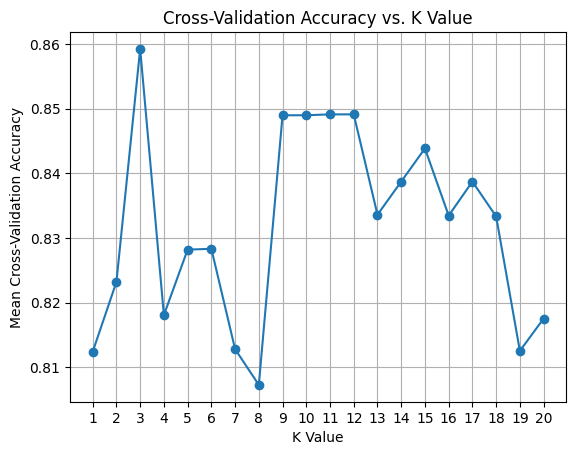

In [ ]:
# Define a range of K values to test
k_values = range(1, 21)  # Adjust the range as needed

# Initialize an empty list to store the mean cross-validation accuracies
cv_accuracies = []

# Iterate over each K value
for k in k_values:
    # Initialize the classifier
    knn = CustomKNN(k)

    # Perform cross-validation
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold cross-validation
    print(cv_scores)
    # Calculate the mean accuracy across folds
    mean_cv_accuracy = np.mean(cv_scores)

    # Append mean accuracy to the list
    cv_accuracies.append(mean_cv_accuracy)

# Plot the results
plt.plot(k_values, cv_accuracies, marker='o')
plt.title('Cross-Validation Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
# Train your classifier
knn = CustomKNN(3)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92        24
         1.0       0.95      0.88      0.91        24

    accuracy                           0.92        48
   macro avg       0.92      0.92      0.92        48
weighted avg       0.92      0.92      0.92        48

